# Regression

In [122]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [123]:
plt.style.use('classic')
random.seed(42)

In [124]:
R_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/STATS 201/Regression_Train.csv", index_col="Unnamed: 0")
R_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/STATS 201/Regression_Test.csv")

In [125]:
R_train.isna().sum()

energy_per_capita    0
gdp_per_capita       0
dtype: int64

In [126]:
R_train.head()

,energy_per_capita,gdp_per_capita
89,953.201548,1015.950361
59,7502.305405,7693.203562
36,106799.608845,24808.737198
92,892.842905,1536.575944
123,98663.451897,39032.010531


In [127]:
R_test.head()

,Unnamed: 0,energy_per_capita,gdp_per_capita
0,213,11806.431966,10714.285462
1,79,13708.618833,8501.753598
2,170,25148.893786,25220.620671
3,88,3712.472500,5971.396550
4,138,21640.178500,12635.043578


In [128]:
from sklearn.metrics import r2_score


In [129]:
R_train.head()

,energy_per_capita,gdp_per_capita
89,953.201548,1015.950361
59,7502.305405,7693.203562
36,106799.608845,24808.737198
92,892.842905,1536.575944
123,98663.451897,39032.010531


In [130]:
X_train = pd.DataFrame(R_train['gdp_per_capita'])
y_train = pd.DataFrame(R_train['energy_per_capita'])


In [131]:
R_test.head()

,Unnamed: 0,energy_per_capita,gdp_per_capita
0,213,11806.431966,10714.285462
1,79,13708.618833,8501.753598
2,170,25148.893786,25220.620671
3,88,3712.472500,5971.396550
4,138,21640.178500,12635.043578


In [132]:

X_test = pd.DataFrame(R_test['gdp_per_capita'])
y_test = pd.DataFrame(R_test['energy_per_capita'])

##Linear Regression

In [133]:
from sklearn import linear_model

In [134]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)


In [135]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')

R2 Score: 0.6411474215142317


In [137]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_pred = mdl.predict(X_test)

# Calculate Mean Squared Error
mean_squared_error(y_test, y_pred)

151085221.16250798

In [139]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,22399.058965
1,18777.221648
2,46145.422598
3,14635.115615
4,25543.272857
5,6491.405201
6,33090.812068
7,16632.971480
8,6875.074715
9,63462.120139


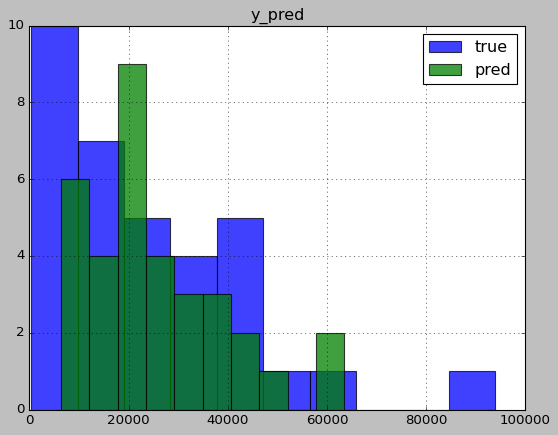

In [140]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()

##Random Forest Regression

In [141]:
from sklearn.ensemble import RandomForestRegressor


In [142]:
mdl = RandomForestRegressor().fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [143]:
# calculate R2
from sklearn.metrics import r2_score

In [144]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')

R2 Score: 0.28571785070497113


In [145]:
# Make predictions on the test set
y_pred = mdl.predict(X_test)

# Calculate Mean Squared Error
mean_squared_error(y_test, y_pred)

300729277.0586873

In [146]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,22986.053759
1,44546.955330
2,72291.115241
3,7170.705450
4,25069.837268
5,799.605513
6,40748.989547
7,8501.717518
8,525.362757
9,88348.111635


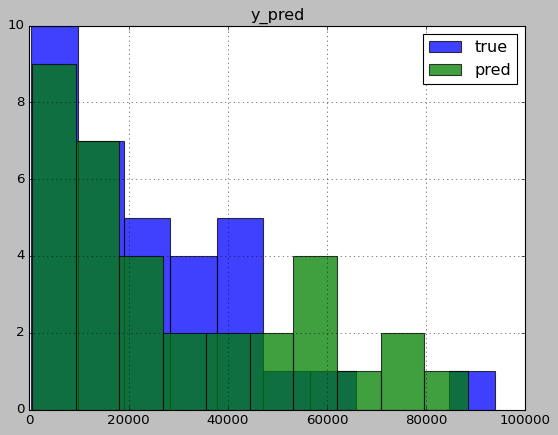

In [147]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()

##Auto ML

In [148]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values

In [ ]:
!pip install autogluon

In [150]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [151]:
train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

In [152]:
predictor = TabularPredictor(
    path='AutogluonModels/regression/',
    label='target'
).fit(train_data)

No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/regression/"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          2
Memory Avail:       10.88 GB / 12.67 GB (85.9%)
Disk Space Avail:  

[1000]	valid_set's rmse: 14475.5
[2000]	valid_set's rmse: 14313.6
[3000]	valid_set's rmse: 14281.9
[4000]	valid_set's rmse: 14276.3
[5000]	valid_set's rmse: 14268
[6000]	valid_set's rmse: 14272


	-14274.6353	 = Validation score   (-root_mean_squared_error)
	0.91s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBM ...
	-14365.5702	 = Validation score   (-root_mean_squared_error)
	0.61s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-12620.0417	 = Validation score   (-root_mean_squared_error)
	0.73s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: CatBoost ...
	-9714.9257	 = Validation score   (-root_mean_squared_error)
	0.32s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-10466.4082	 = Validation score   (-root_mean_squared_error)
	0.66s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-11519.0012	 = Validation score   (-root_mean_squared_error)
	2.07s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: XGBoost ...
	-13611.4479	 = Validation score   (-root_mean_squared_error)
	0.53s	 = Training   runtime
	0.01s

In [153]:
predictor = TabularPredictor.load("AutogluonModels/regression/")


In [154]:
# reference: https://auto.gluon.ai/stable/cheatsheet.html
# https://auto.gluon.ai/0.3.1/api/autogluon.tabular.models.html
predictor.leaderboard(silent=True, data=test_data, extra_metrics=["root_mean_squared_error", "mean_squared_error", "mean_absolute_error", "median_absolute_error", "r2"])

,model,score_test,root_mean_squared_error,mean_squared_error,mean_absolute_error,median_absolute_error,r2,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetFastAI,-12511.513082,-12511.513082,-1.565380e+08,-9463.256442,-6360.618476,0.628196,-11519.001209,root_mean_squared_error,0.133438,0.025558,2.072870,0.133438,0.025558,2.072870,1,True,8
1,CatBoost,-15114.959943,-15114.959943,-2.284620e+08,-9650.728149,-5378.433927,0.457365,-9714.925676,root_mean_squared_error,0.004142,0.002650,0.321438,0.004142,0.002650,0.321438,1,True,6
2,KNeighborsDist,-15645.625823,-15645.625823,-2.447856e+08,-10730.470457,-7596.535228,0.418593,-12763.088347,root_mean_squared_error,0.017993,0.017483,0.007573,0.017993,0.017483,0.007573,1,True,2
3,KNeighborsUnif,-16355.365635,-16355.365635,-2.674980e+08,-10233.309357,-5047.512776,0.364648,-9603.679617,root_mean_squared_error,0.044662,0.027655,0.007596,0.044662,0.027655,0.007596,1,True,1
4,NeuralNetTorch,-16598.820018,-16598.820018,-2.755208e+08,-9353.115854,-5148.955510,0.345592,-6986.055544,root_mean_squared_error,0.014989,0.009915,1.797162,0.014989,0.009915,1.797162,1,True,10
5,WeightedEnsemble_L2,-16598.820018,-16598.820018,-2.755208e+08,-9353.115854,-5148.955510,0.345592,-6986.055544,root_mean_squared_error,0.021103,0.010652,2.303749,0.006114,0.000737,0.506588,2,True,12
6,ExtraTreesMSE,-16719.894946,-16719.894946,-2.795549e+08,-11569.339550,-7664.456338,0.336011,-10466.408198,root_mean_squared_error,0.160793,0.060142,0.655271,0.160793,0.060142,0.655271,1,True,7
7,RandomForestMSE,-18184.206312,-18184.206312,-3.306654e+08,-12843.421717,-9688.308970,0.214615,-12620.041701,root_mean_squared_error,0.103892,0.068930,0.730204,0.103892,0.068930,0.730204,1,True,5
8,XGBoost,-18556.167460,-18556.167460,-3.443314e+08,-13133.673768,-9710.147225,0.182156,-13611.447934,root_mean_squared_error,0.031121,0.005377,0.533331,0.031121,0.005377,0.533331,1,True,9
9,LightGBMLarge,-18933.008148,-18933.008148,-3.584588e+08,-11953.755990,-7979.680332,0.148601,-8220.743393,root_mean_squared_error,0.026708,0.003571,0.773153,0.026708,0.003571,0.773153,1,True,11


In [155]:
r2 = r2_score(y_test,
              predictor.predict(
                  X_test)
              )
print(f'R2 Score: {r2}')

R2 Score: 0.34559212299301634


In [156]:
# Make predictions on the test set
y_pred = mdl.predict(X_test)

# Calculate Mean Squared Error
mean_squared_error(y_test, y_pred)

300729277.0586873

In [157]:
y_pred = predictor.predict(X_test)
y_pred

0     19298.410156
1     14895.196289
2     70167.664062
3      8949.483398
4     25255.435547
5         9.608423
6     39902.156250
7     11846.606445
8       352.817200
9     98110.476562
10    25825.150391
11    49907.382812
12    49796.882812
13    10459.637695
14    95417.898438
15     9174.745117
16    38921.246094
17    15539.093750
18    29496.687500
19    26516.875000
20    53878.367188
21    59820.730469
22    14795.715820
23     2456.160889
24      562.451477
25    16101.630859
26        0.002072
27    72961.789062
28    17388.783203
29    16107.432617
30    15386.241211
31     2969.968506
32    20115.339844
33    36377.296875
Name: target, dtype: float32

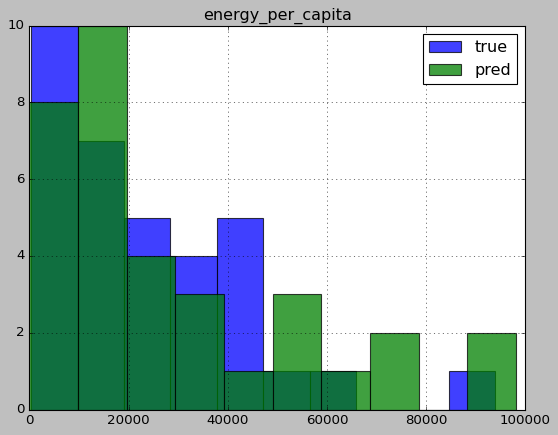

In [158]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()